# Задача: Сравнение методов классификации. Лямин Владимир Андреевич. Группа 22.М05
Задача
1. [+] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
2. [+] Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
3. [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
4. [+] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
5. [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
6. [+] Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
7. [+] Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
8. [+] Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
10. (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

Подключаем библиотеки

In [129]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем данные

In [130]:
df = pd.read_csv('newCovid.csv')

In [131]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [132]:
df.head()

,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,OBESITY,TOBACCO,CLASIFFICATION_FINAL,survival
0,1.0,1.0,1.0,1.0,65.0,2.0,1.0,2.0,2.0,3.0,1
1,1.0,2.0,2.0,1.0,59.0,1.0,2.0,2.0,1.0,3.0,0
2,1.0,1.0,1.0,2.0,37.0,2.0,2.0,2.0,2.0,3.0,0
3,1.0,1.0,2.0,2.0,25.0,2.0,2.0,2.0,2.0,7.0,0
4,1.0,1.0,1.0,2.0,23.0,2.0,2.0,2.0,2.0,7.0,0


In [133]:
print(len(df))

52429


## Посмотрим на результат библиотечных функий


In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['survival']
X = df.drop(columns=['survival'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

### Logistic Regression


In [135]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
acc = lr.score(X_test_scaled, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.9359


### K-Nearest Neighbour


In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)

print("{} NN Score: {:.4f}".format(3, knn.score(X_test_scaled, y_test)))

acc = knn.score(X_test_scaled, y_test)
accuracies['NN'] = acc

3 NN Score: 0.9312


### Support Vector Machine

In [137]:
from sklearn.svm import SVC

svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.9371


### Naive Bayes Algorithm


In [138]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.9333


### Decision Tree Algorithm

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.9237


## Посмотрим выполнение алгоритма на методе логистической регрессии

In [140]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

In [141]:
def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

In [142]:
def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [143]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

In [144]:
def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [145]:
from scipy import optimize
def fit(x, y, theta):
    opt_weights = optimize.fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y))
    return opt_weights[0]

Подберем оптимальные параметры для алгоритма

In [146]:
theta = np.zeros((X_train.shape[1], 1))
parameters = fit(X_train, y_train, theta)

In [147]:
def predictLR(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

In [148]:
def predictionsLR(test):
    predictions = []
    for row in test:
        prediction = (predictLR(row) >= 
                         0.5).astype(int)
        predictions.append(prediction)
    return(predictions)

In [149]:
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predictLR(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy

In [150]:
print(accuracy(X_train, y_train))
acc = accuracy(X_test, y_test)
accuracies['My Logistic Regression'] = acc

0.9276839237057221


## Сравнение моделей

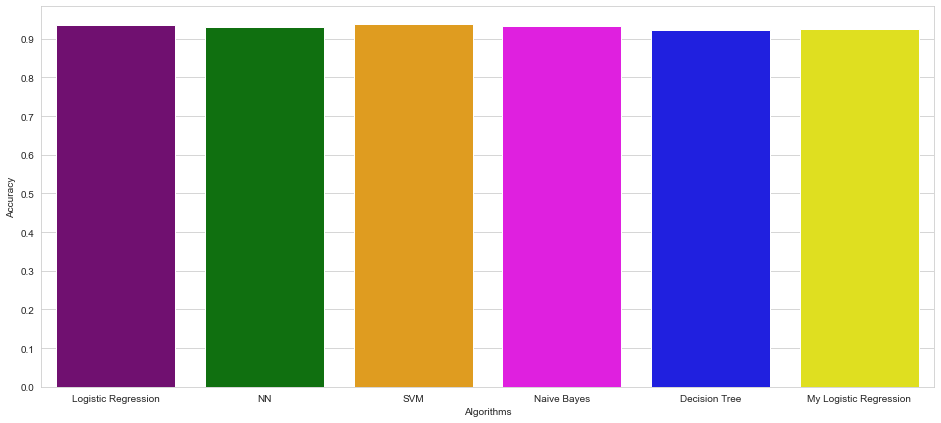

In [151]:
colors = ["purple", "green", "orange", "magenta", "blue", "yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Построение Confusion Matrix

In [152]:

y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)

y_head_Mylr = predictionsLR(X_test.values.tolist())

In [153]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_MyLR = confusion_matrix(y_test, y_head_Mylr)

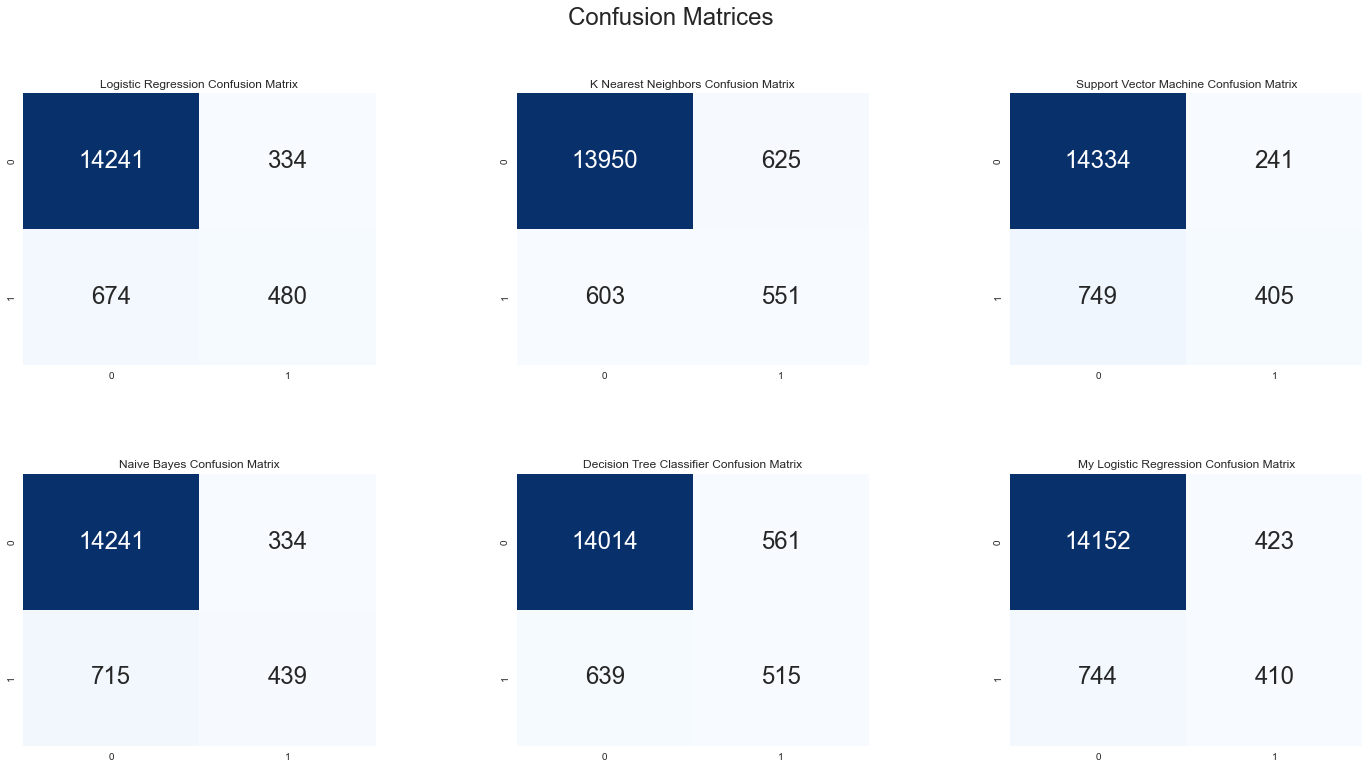

In [154]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("My Logistic Regression Confusion Matrix")
sns.heatmap(cm_MyLR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Выводы

Можно увидеть, что наилучший результат дала библиотечная модель k ближайших соседей, а также библиотечная модель дерева решений. Плохие результаты дала модель логистической регрессии, собственная логистическая регрессия а также наивный байесовский классификатор. Также можно заметить, что лучшие алгоритмы дают 0 ошибок второго рода, что важно при предсказании заболеваний. Тогда как при логистической регрессии количесво ошибок первого и второго рода отличается всего примерно в 2 раза.